**Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/DataSource/data_mortality_rate.xlsx'

df = pd.read_excel(path)
df.head()

,Year of Date,Month of Date,Day of Date,Count of Sheet1,Crude Birth Ratio,Crude Death Ratio,HIV Prevalence,Immunization Measless,Infant Mortality Rate,Life expentancy rate,Malaria Prevalence,Maternal Mortality Rate,Nurse Density,Pharmaceutical,Physi density,TB Prevalence,Undernourish Population,Underweight Children,immunization DPT
0,1990,December,31,10,295.2,76.5,1.82,698.0,471.4,674.8,0.0,3281.0,849.62,0.0,849.62,0.0,273.8,280.6,740.0
1,1991,December,31,10,289.1,75.5,2.69,696.0,458.2,678.1,0.0,3093.0,767.07,76.0,767.07,0.0,273.8,243.2,734.0
2,1992,December,31,10,282.9,74.6,3.23,720.0,445.7,681.2,0.0,2908.0,519.69,24.0,519.69,0.0,268.1,214.1,722.0
3,1993,December,31,10,276.3,73.9,3.75,739.0,433.5,683.1,0.0,2787.0,828.39,81.0,828.39,0.0,264.0,225.6,737.0
4,1994,December,31,10,268.6,71.5,4.09,812.0,422.0,687.9,0.0,2631.0,555.81,0.0,555.81,0.0,239.1,183.4,779.0


In [ ]:
# Menentukan Input Variabel
X = df[['Crude Birth Ratio', 'Crude Death Ratio',	'HIV Prevalence',	'Immunization Measless',	'Infant Mortality Rate',	'Life expentancy rate',	'Malaria Prevalence',	'Maternal Mortality Rate',	'Nurse Density',	'Pharmaceutical',	'Physi density',	'TB Prevalence',	'Undernourish Population',	'Underweight Children',	'immunization DPT']]

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_x = scaler.fit_transform(X)
x = scaled_x

**Using the elbow method to find the optimal number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

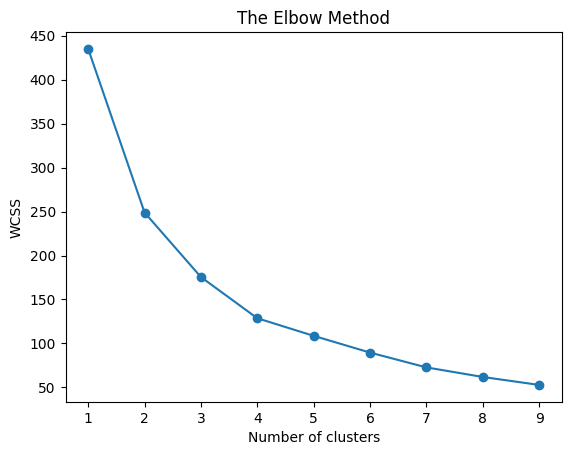

In [ ]:
from sklearn.cluster import KMeans

range = range(1,10)
wcss = []

for num_cluster in range:
    kmeans = KMeans(num_cluster, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range, wcss,  marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Training the K-Means model on the dataset**

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 15)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster'] = y_kmeans
df.head()

,Year of Date,Month of Date,Day of Date,Count of Sheet1,Crude Birth Ratio,Crude Death Ratio,HIV Prevalence,Immunization Measless,Infant Mortality Rate,Life expentancy rate,Malaria Prevalence,Maternal Mortality Rate,Nurse Density,Pharmaceutical,Physi density,TB Prevalence,Undernourish Population,Underweight Children,immunization DPT,cluster
0,1990,December,31,10,295.2,76.5,1.82,698.0,471.4,674.8,0.0,3281.0,849.62,0.0,849.62,0.0,273.8,280.6,740.0,2
1,1991,December,31,10,289.1,75.5,2.69,696.0,458.2,678.1,0.0,3093.0,767.07,76.0,767.07,0.0,273.8,243.2,734.0,2
2,1992,December,31,10,282.9,74.6,3.23,720.0,445.7,681.2,0.0,2908.0,519.69,24.0,519.69,0.0,268.1,214.1,722.0,2
3,1993,December,31,10,276.3,73.9,3.75,739.0,433.5,683.1,0.0,2787.0,828.39,81.0,828.39,0.0,264.0,225.6,737.0,2
4,1994,December,31,10,268.6,71.5,4.09,812.0,422.0,687.9,0.0,2631.0,555.81,0.0,555.81,0.0,239.1,183.4,779.0,2


**Visualising the clusters**

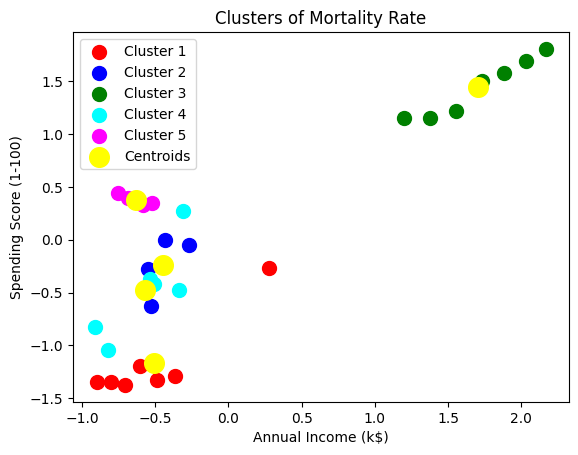

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Mortality Rate')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Evaluation
# labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w = davies_bouldin_score(x, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
1.0183852791740733
